<a href="https://colab.research.google.com/github/marioklau/UTS_Data_Mining/blob/main/UTS_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Processing

In [266]:
import pandas as pd
import matplotlib.pyplot as plt

In [267]:
data = pd.read_excel('dataset.xlsx')

In [268]:
data.head()

,Jumlah penduduk,Luas Wilayah (KM),Jumlah Rumah,TEMBOK,Jumlah sekolah (SMP-SMA),Jumlah RS,Usia 15-64 (%),Indihome,Lokal
0,89863,48.466,20892,16914.1632,5,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,6,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,10,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,10,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,8,-,107590.464,ada,ada


In [269]:
data.head(20)

,Jumlah penduduk,Luas Wilayah (KM),Jumlah Rumah,TEMBOK,Jumlah sekolah (SMP-SMA),Jumlah RS,Usia 15-64 (%),Indihome,Lokal
0,89863,48.466,20892,16914.1632,5,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,6,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,10,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,10,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,8,-,107590.464,ada,ada
5,72183,152.070,15942,12906.6432,4,-,49373.172,ada,ada
6,118278,91.940,28307,22917.3472,18,-,80902.152,ada,tidak
7,89712,54.570,21331,17269.5776,11,1,61363.008,ada,tidak
8,140119,51.030,32348,26188.9408,13,-,95841.396,ada,ada
9,100495,40.140,24299,19672.4704,9,1,68738.580,ada,tidak


In [270]:
new_columns = [col.replace('Jumlah penduduk', 'jumlah_penduduk').replace('Luas Wilayah (KM)', 'luas_wilayah').replace('Jumlah Rumah', 'jumlah_rumah').replace('TEMBOK', 'tembok')
.replace('Jumlah sekolah (SMP-SMA)', 'sekolah').replace('Jumlah RS', 'jumlah_rs').replace('Usia 15-64 (%)', 'usia').replace('Indihome', 'indihome').replace('Lokal', 'lokal')for col in data.columns]
data.columns = new_columns
data.head(2)

,jumlah_penduduk,luas_wilayah,jumlah_rumah,tembok,sekolah,jumlah_rs,usia,indihome,lokal
0,89863,48.466,20892,16914.1632,5,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,6,-,35286.876,ada,ada


In [271]:
## Data Transformasi
def transformasi_penduduk(penduduk):
  if (penduduk >= 50000) and (penduduk < 100000):
    return '50000-100000'
  elif (penduduk >= 100000) and (penduduk < 200000):
    return '100000-200000'
  elif (penduduk) >= 200000:
    return '>200000'
  else:
    return '<50000'
data['jumlah_penduduk'] = data['jumlah_penduduk'].apply(transformasi_penduduk)

def transformasi_indihome(indihome):
  if indihome == 'ada':
    return 1
  else:
    return 0
data['indihome'] = data['indihome'].apply(transformasi_indihome)

def transformasi_lokal(lokal):
  if lokal == 'ada':
    return 1
  else:
    return 0
data['lokal'] = data['lokal'].apply(transformasi_lokal)

def transformasi_rs(rs):
  if rs == 1:
    return 1
  else:
    return 0
data['jumlah_rs'] = data['jumlah_rs'].apply(transformasi_rs)
data.head()

,jumlah_penduduk,luas_wilayah,jumlah_rumah,tembok,sekolah,jumlah_rs,usia,indihome,lokal
0,50000-100000,48.466,20892,16914.1632,5,0,61466.292,1,1
1,50000-100000,148.370,10887,8814.1152,6,0,35286.876,1,1
2,50000-100000,239.580,25805,20891.7280,10,0,64142.100,1,1
3,50000-100000,55.000,22143,17926.9728,10,1,61161.912,1,1
4,100000-200000,195.410,39204,31739.5584,8,0,107590.464,1,1


In [272]:
data.head(20)

,jumlah_penduduk,luas_wilayah,jumlah_rumah,tembok,sekolah,jumlah_rs,usia,indihome,lokal
0,50000-100000,48.466,20892,16914.1632,5,0,61466.292,1,1
1,50000-100000,148.370,10887,8814.1152,6,0,35286.876,1,1
2,50000-100000,239.580,25805,20891.7280,10,0,64142.100,1,1
3,50000-100000,55.000,22143,17926.9728,10,1,61161.912,1,1
4,100000-200000,195.410,39204,31739.5584,8,0,107590.464,1,1
5,50000-100000,152.070,15942,12906.6432,4,0,49373.172,1,1
6,100000-200000,91.940,28307,22917.3472,18,0,80902.152,1,0
7,50000-100000,54.570,21331,17269.5776,11,1,61363.008,1,0
8,100000-200000,51.030,32348,26188.9408,13,0,95841.396,1,1
9,100000-200000,40.140,24299,19672.4704,9,1,68738.580,1,0


## Univariate

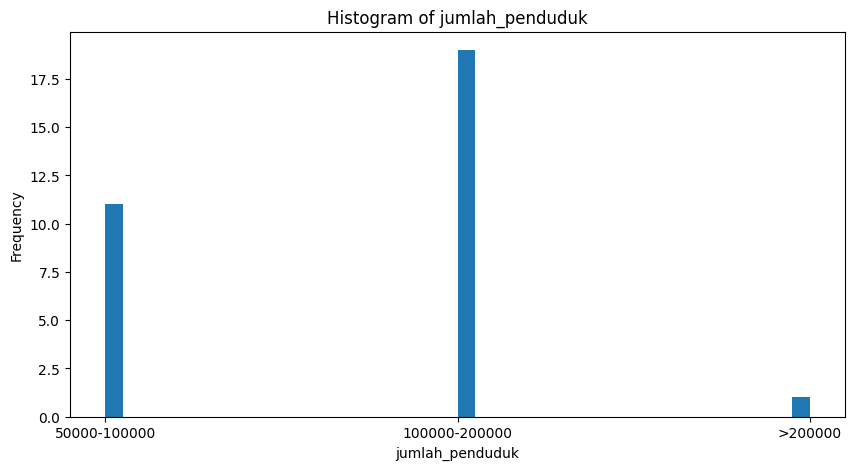

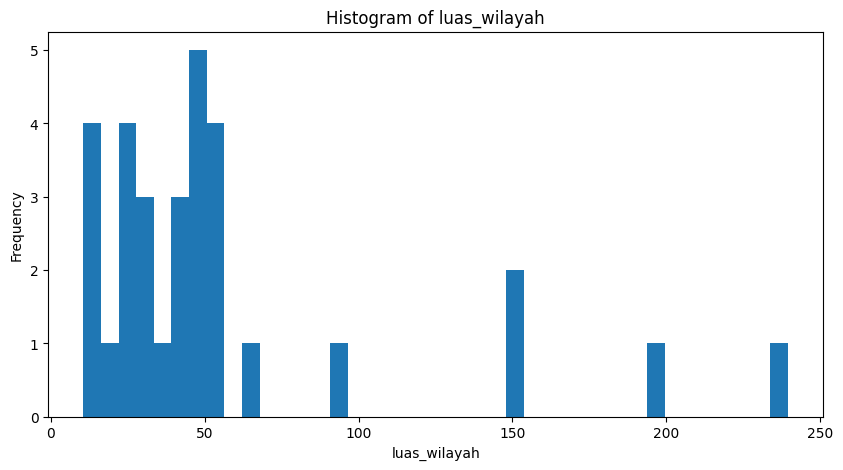

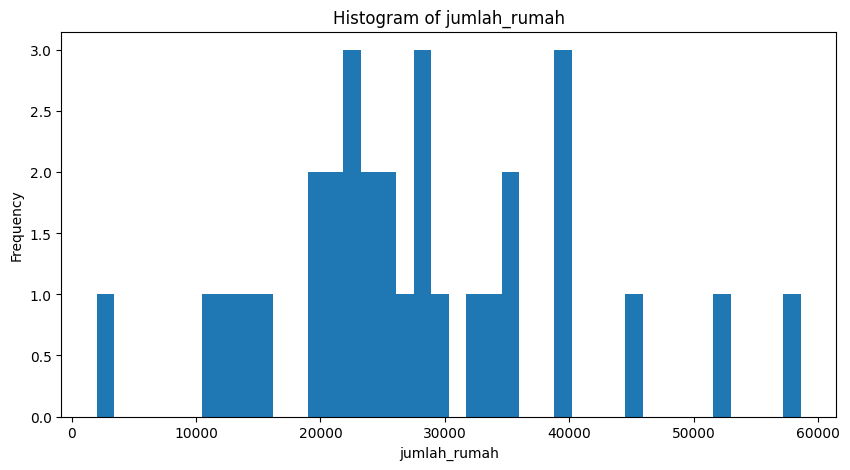

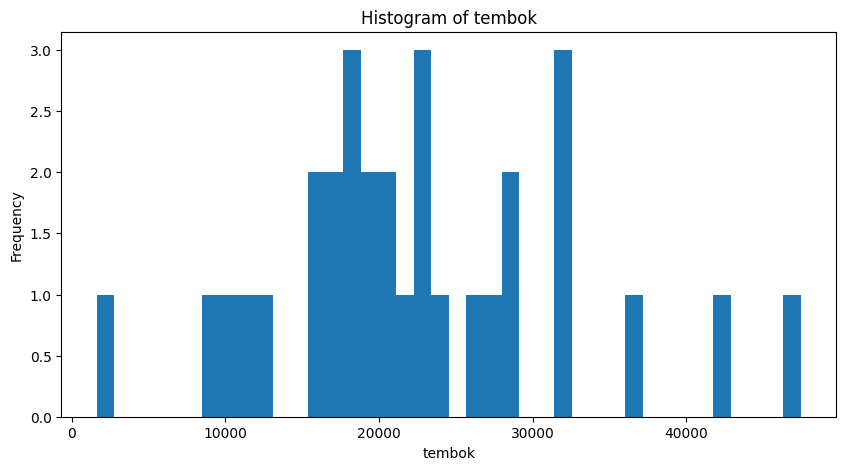

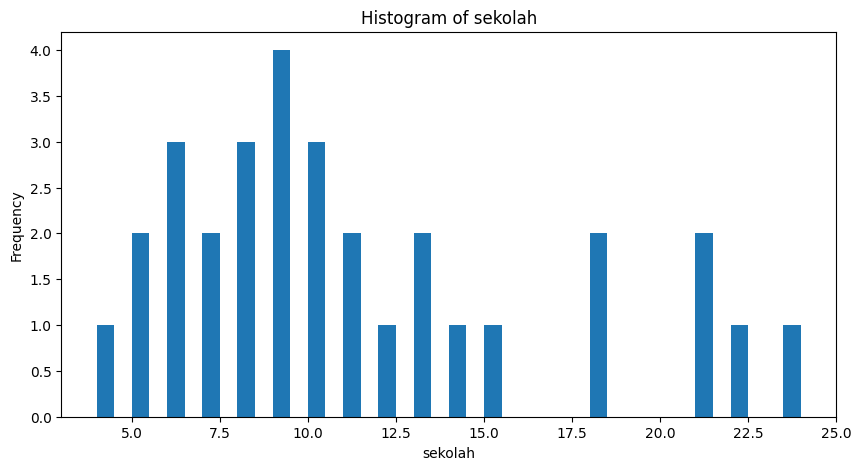

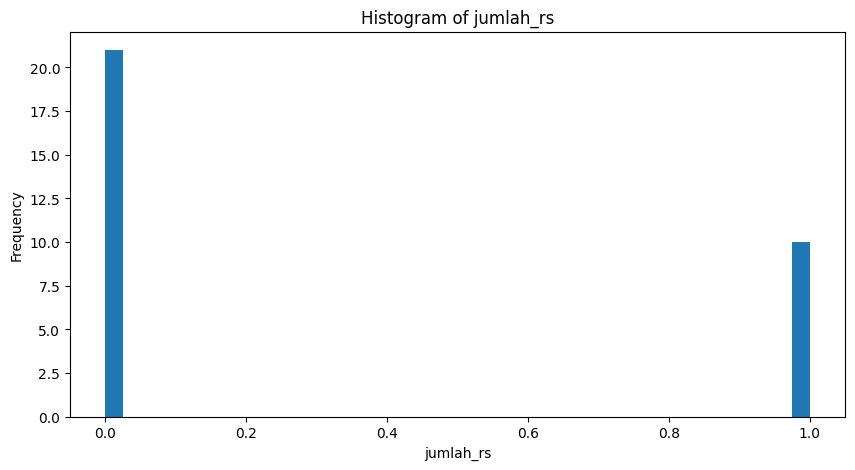

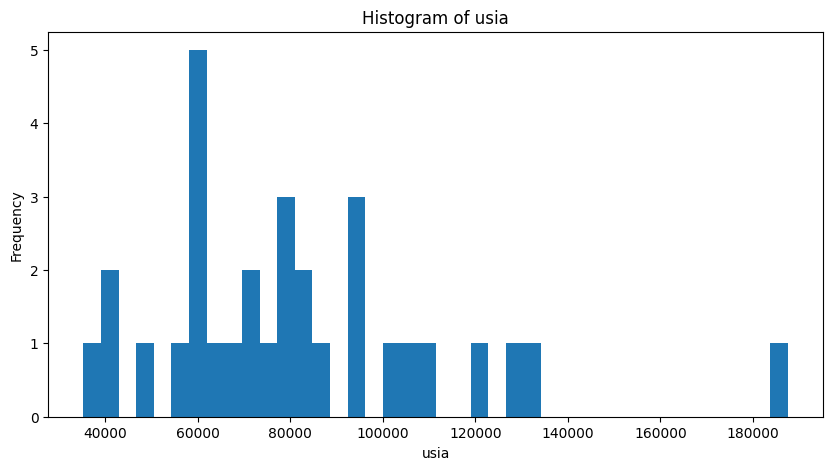

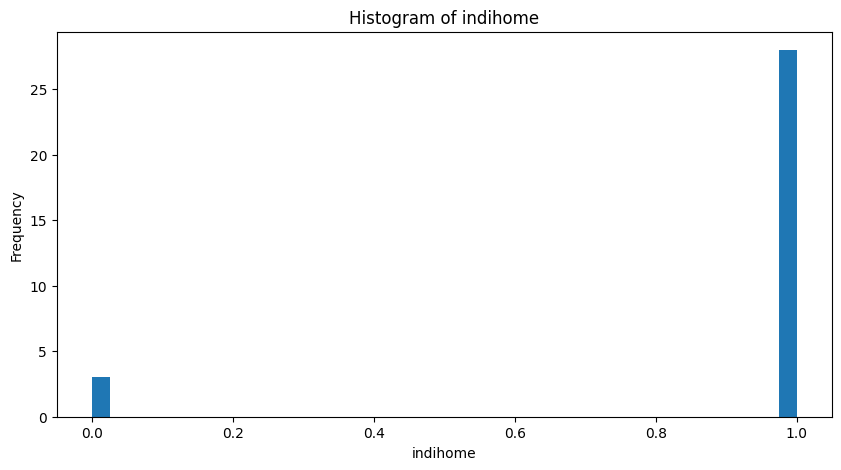

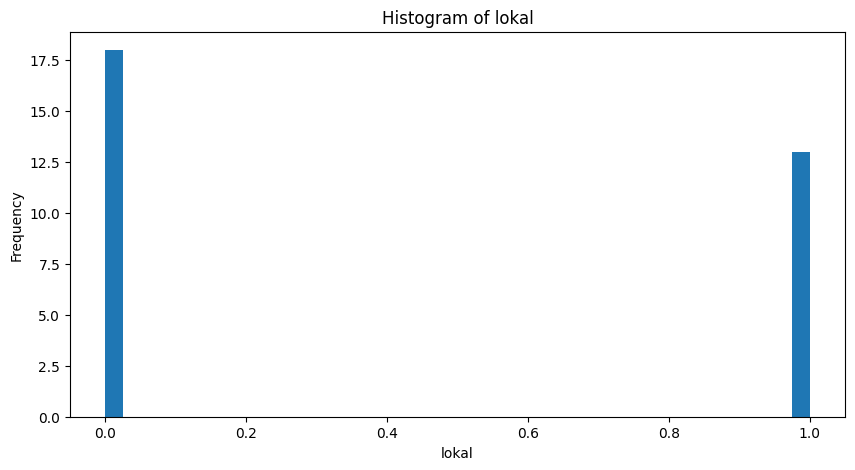

In [273]:
import matplotlib.pyplot as plt

for column in data.columns:
  plt.figure(figsize=(10, 5))
  plt.hist(data[column], bins=40)
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

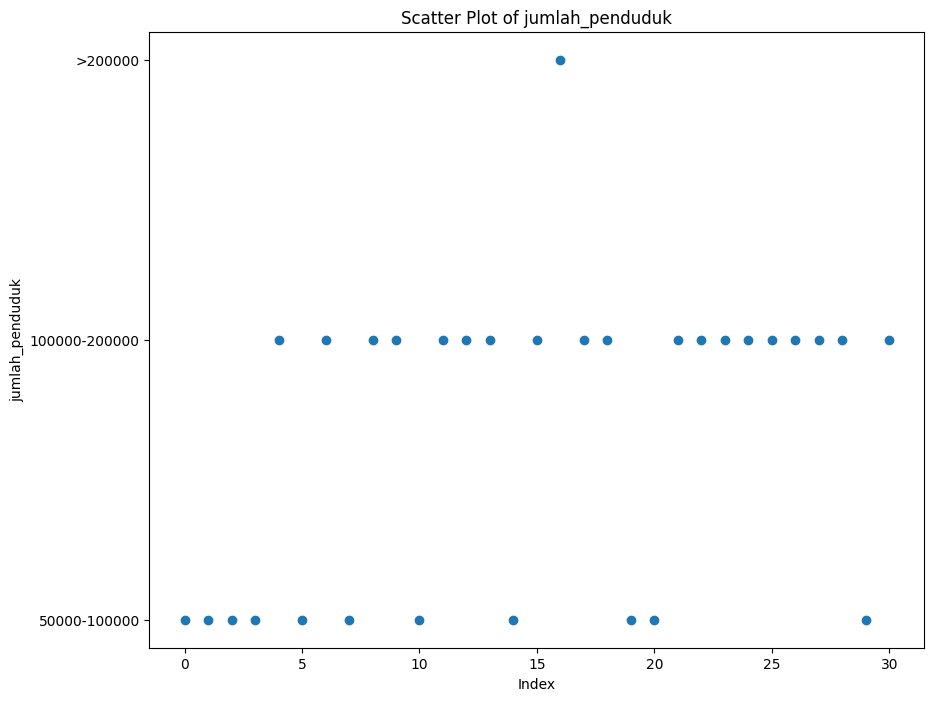

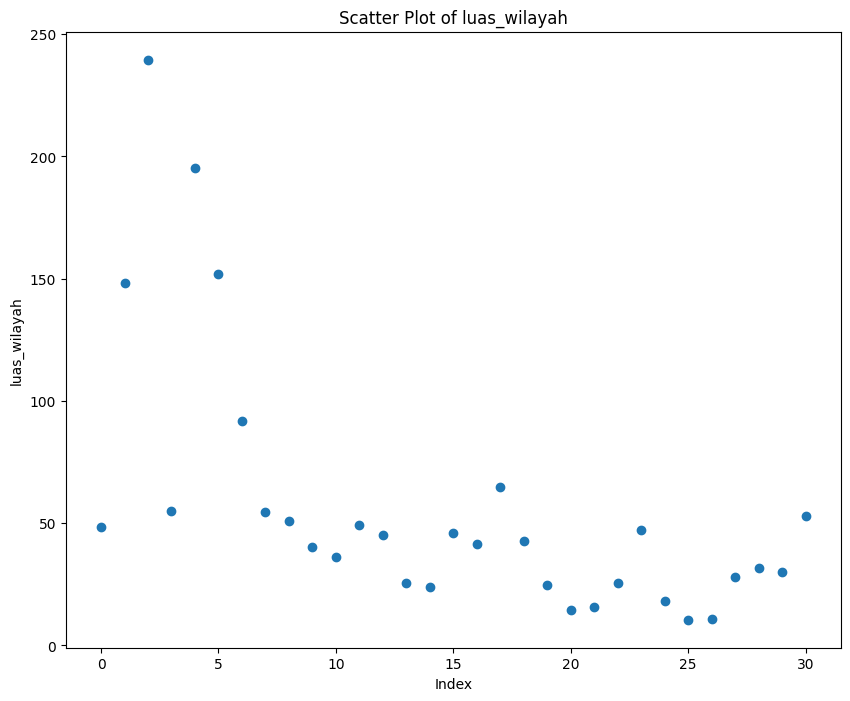

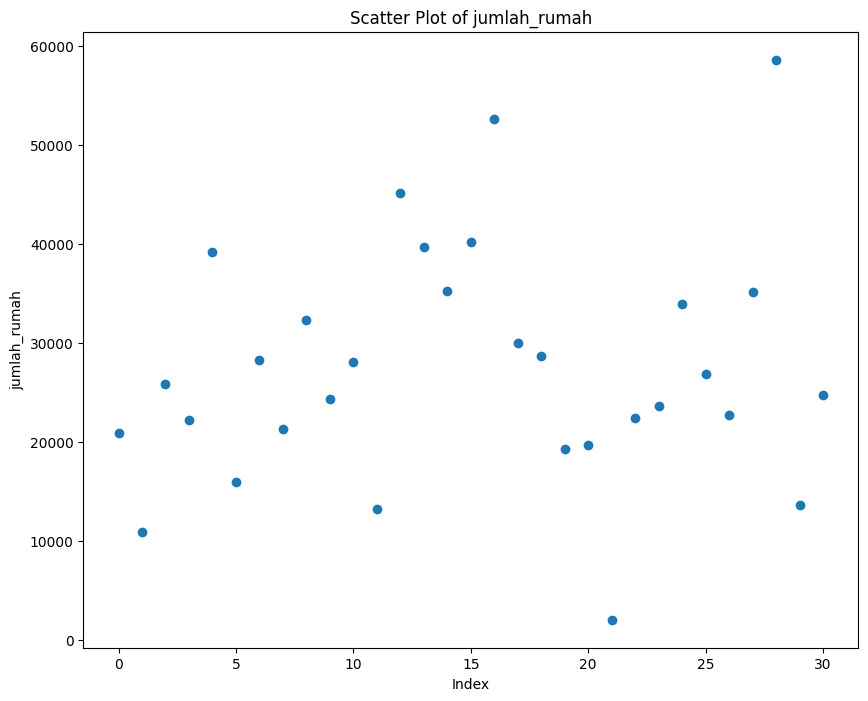

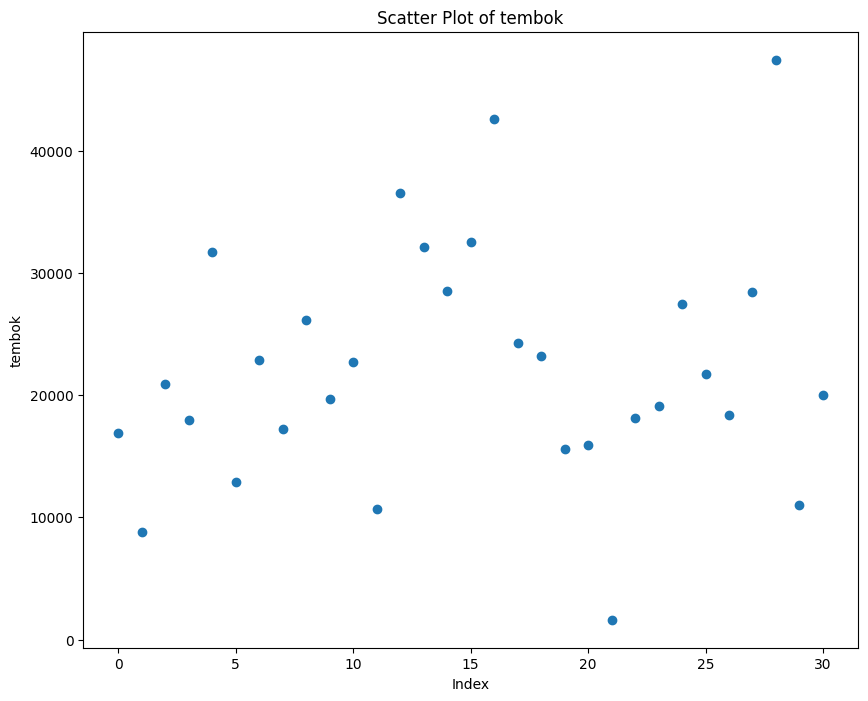

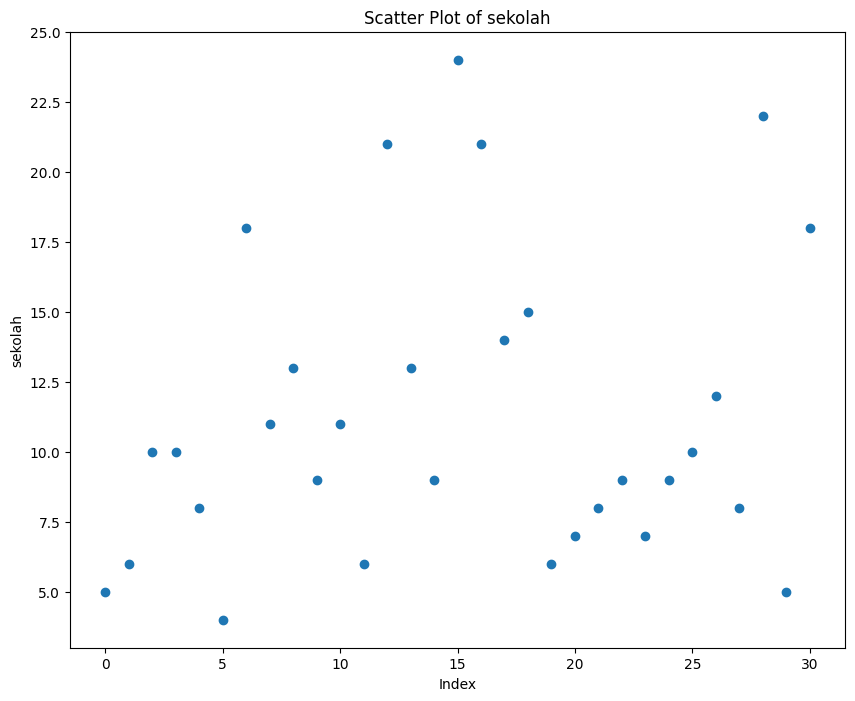

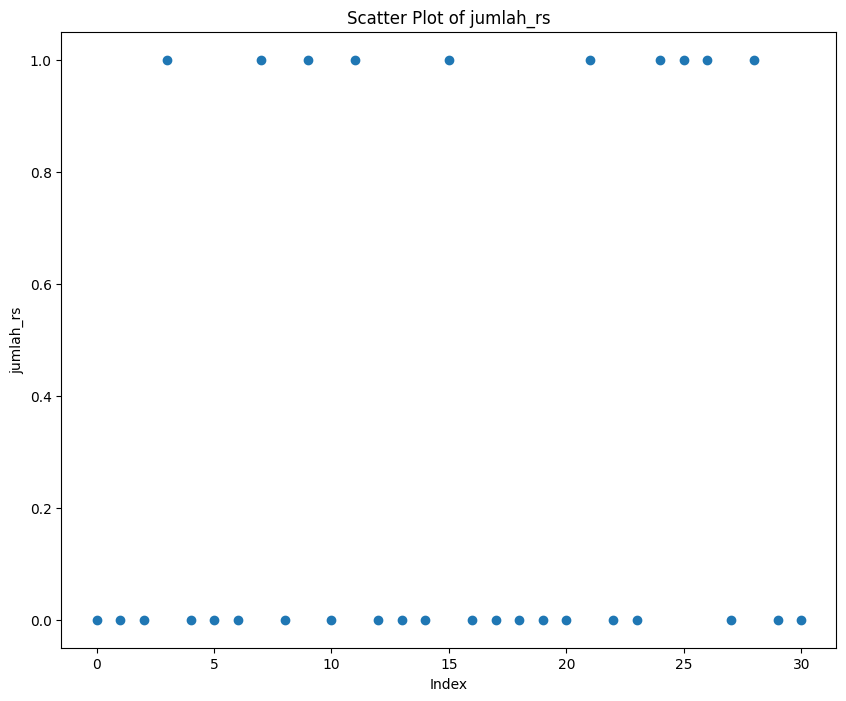

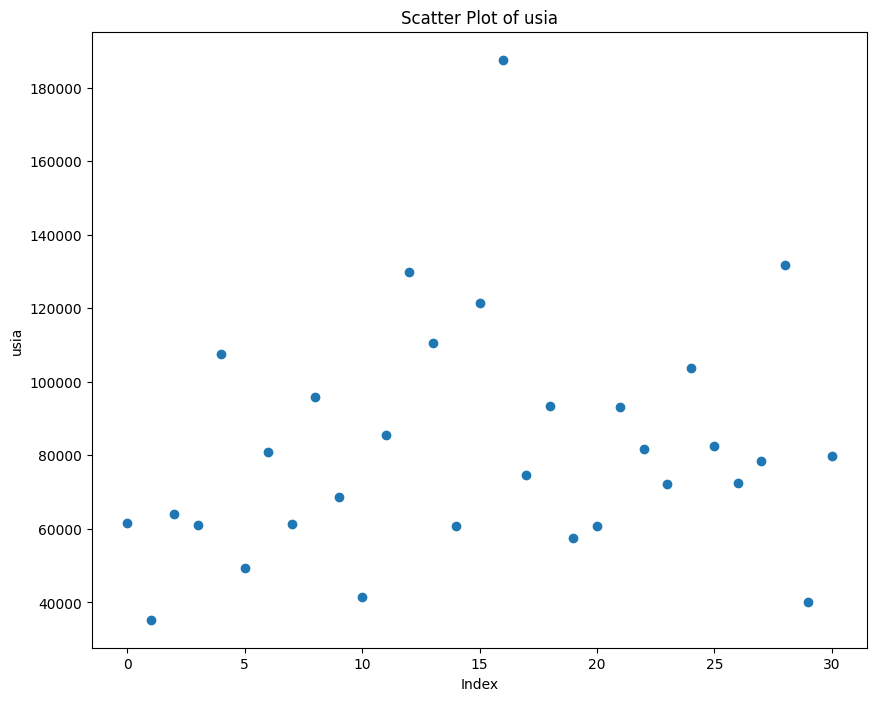

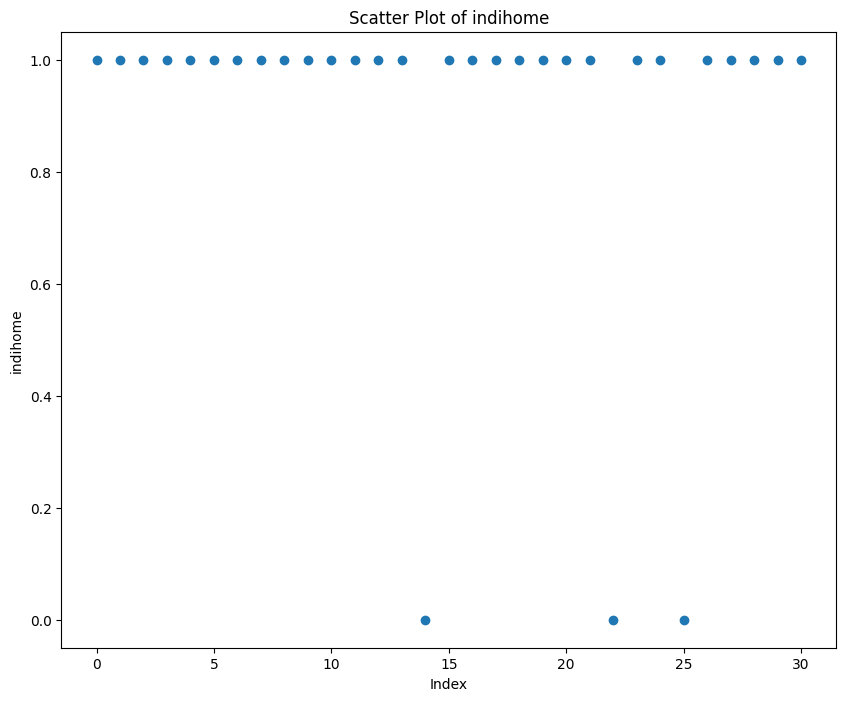

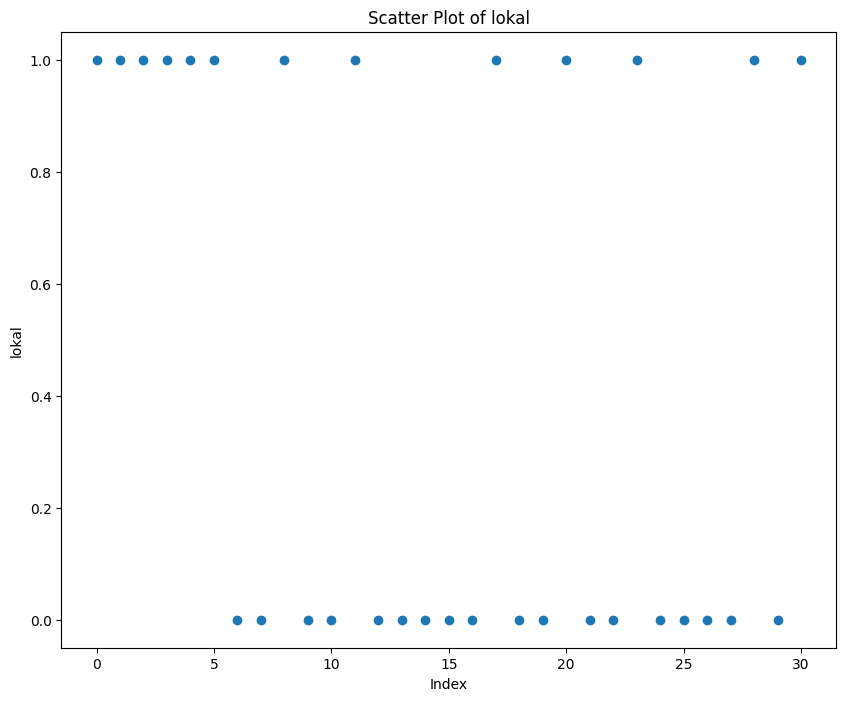

In [274]:
for column in data.columns:
  plt.figure(figsize=(10, 8))
  plt.scatter(data.index, data[column])
  plt.title(f"Scatter Plot of {column}")
  plt.xlabel("Index")
  plt.ylabel(column)
  plt.show()

Terdapat banyak outlier pada scatter plot setiap fiturnya.

## Data Olah Encoding

In [275]:
from sklearn.preprocessing import LabelEncoder
dataolahencoding = df=data.copy()

encoder = LabelEncoder()
dataolahencoding['jumlah_penduduk_encod'] = encoder.fit_transform(dataolahencoding['jumlah_penduduk'])
dataolahencoding['luas_wilayah_encod'] = encoder.fit_transform(dataolahencoding['luas_wilayah'])
dataolahencoding['jumlah_rumah_encod'] = encoder.fit_transform(dataolahencoding['jumlah_rumah'])
dataolahencoding['tembok_encod'] = encoder.fit_transform(dataolahencoding['tembok'])
dataolahencoding['sekolah_encod'] = encoder.fit_transform(dataolahencoding['sekolah'])
dataolahencoding['jumlah_rs_encod'] = encoder.fit_transform(dataolahencoding['jumlah_rs'])
dataolahencoding['usia_encod'] = encoder.fit_transform(dataolahencoding['usia'])
dataolahencoding['indihome_encod'] = encoder.fit_transform(dataolahencoding['indihome'])
dataolahencoding['lokal_encod'] = encoder.fit_transform(dataolahencoding['lokal'])

In [276]:
dataolahencoding.head()

,jumlah_penduduk,luas_wilayah,jumlah_rumah,tembok,sekolah,jumlah_rs,usia,indihome,lokal,jumlah_penduduk_encod,luas_wilayah_encod,jumlah_rumah_encod,tembok_encod,sekolah_encod,jumlah_rs_encod,usia_encod,indihome_encod,lokal_encod
0,50000-100000,48.466,20892,16914.1632,5,0,61466.292,1,1,1,19,7,7,1,0,9,1,1
1,50000-100000,148.370,10887,8814.1152,6,0,35286.876,1,1,1,27,1,1,2,0,0,1,1
2,50000-100000,239.580,25805,20891.7280,10,0,64142.100,1,1,1,30,15,15,6,0,10,1,1
3,50000-100000,55.000,22143,17926.9728,10,1,61161.912,1,1,1,24,9,9,6,1,7,1,1
4,100000-200000,195.410,39204,31739.5584,8,0,107590.464,1,1,0,29,25,25,4,0,25,1,1


In [277]:
dataolahencoding = dataolahencoding.drop(['jumlah_penduduk', 'luas_wilayah', 'jumlah_rumah', 'tembok', 'sekolah', 'jumlah_rs', 'usia', 'indihome', 'lokal'], axis=1)
dataolahencoding.head()

,jumlah_penduduk_encod,luas_wilayah_encod,jumlah_rumah_encod,tembok_encod,sekolah_encod,jumlah_rs_encod,usia_encod,indihome_encod,lokal_encod
0,1,19,7,7,1,0,9,1,1
1,1,27,1,1,2,0,0,1,1
2,1,30,15,15,6,0,10,1,1
3,1,24,9,9,6,1,7,1,1
4,0,29,25,25,4,0,25,1,1


## Multivariate

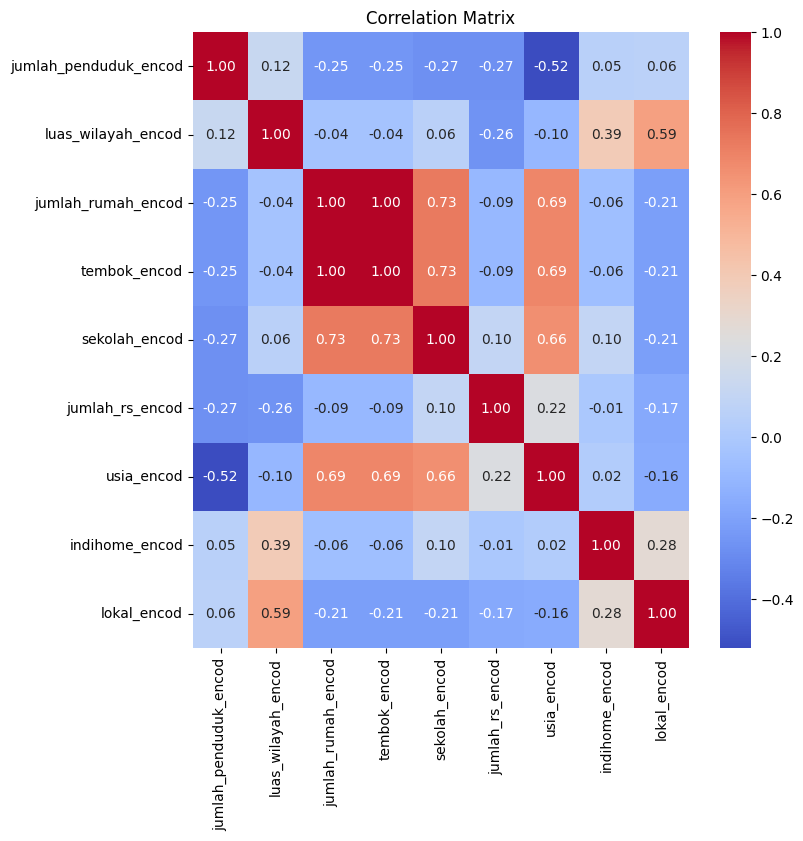

In [280]:
import seaborn as sns

correlation_matrix = dataolahencoding.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Korelasi Positif Tinggi:

* jumlah_rumah_encod memiliki korelasi positif yang tinggi dengan tembok_encod (0.73) dan sekolah_encod (0.73). Ini menunjukkan bahwa semakin tinggi jumlah rumah, biasanya terdapat lebih banyak sekolah dan dinding yang dibangun dari bahan yang lebih baik.
tembok_encod juga berkorelasi tinggi dengan sekolah_encod (0.73), yang bisa mengindikasikan daerah dengan bangunan yang lebih berkualitas memiliki lebih banyak fasilitas sekolah.
Korelasi Negatif:

* usia_encod memiliki korelasi negatif dengan jumlah_penduduk_encod (-0.52), yang mungkin menunjukkan bahwa wilayah dengan penduduk berusia lebih tinggi memiliki jumlah penduduk yang lebih kecil.
Korelasi Moderat:

* luas_wilayah_encod memiliki korelasi moderat dengan indihome_encod (0.39) dan lokal_encod (0.59), yang dapat menunjukkan daerah yang lebih luas memiliki lebih banyak akses ke layanan internet lokal atau nasional.
Hubungan Tidak Signifikan:

* Banyak nilai korelasi yang mendekati nol, seperti antara jumlah_rs_encod dengan usia_encod, yang menunjukkan bahwa variabel-variabel ini mungkin tidak memiliki hubungan linier yang signifikan.

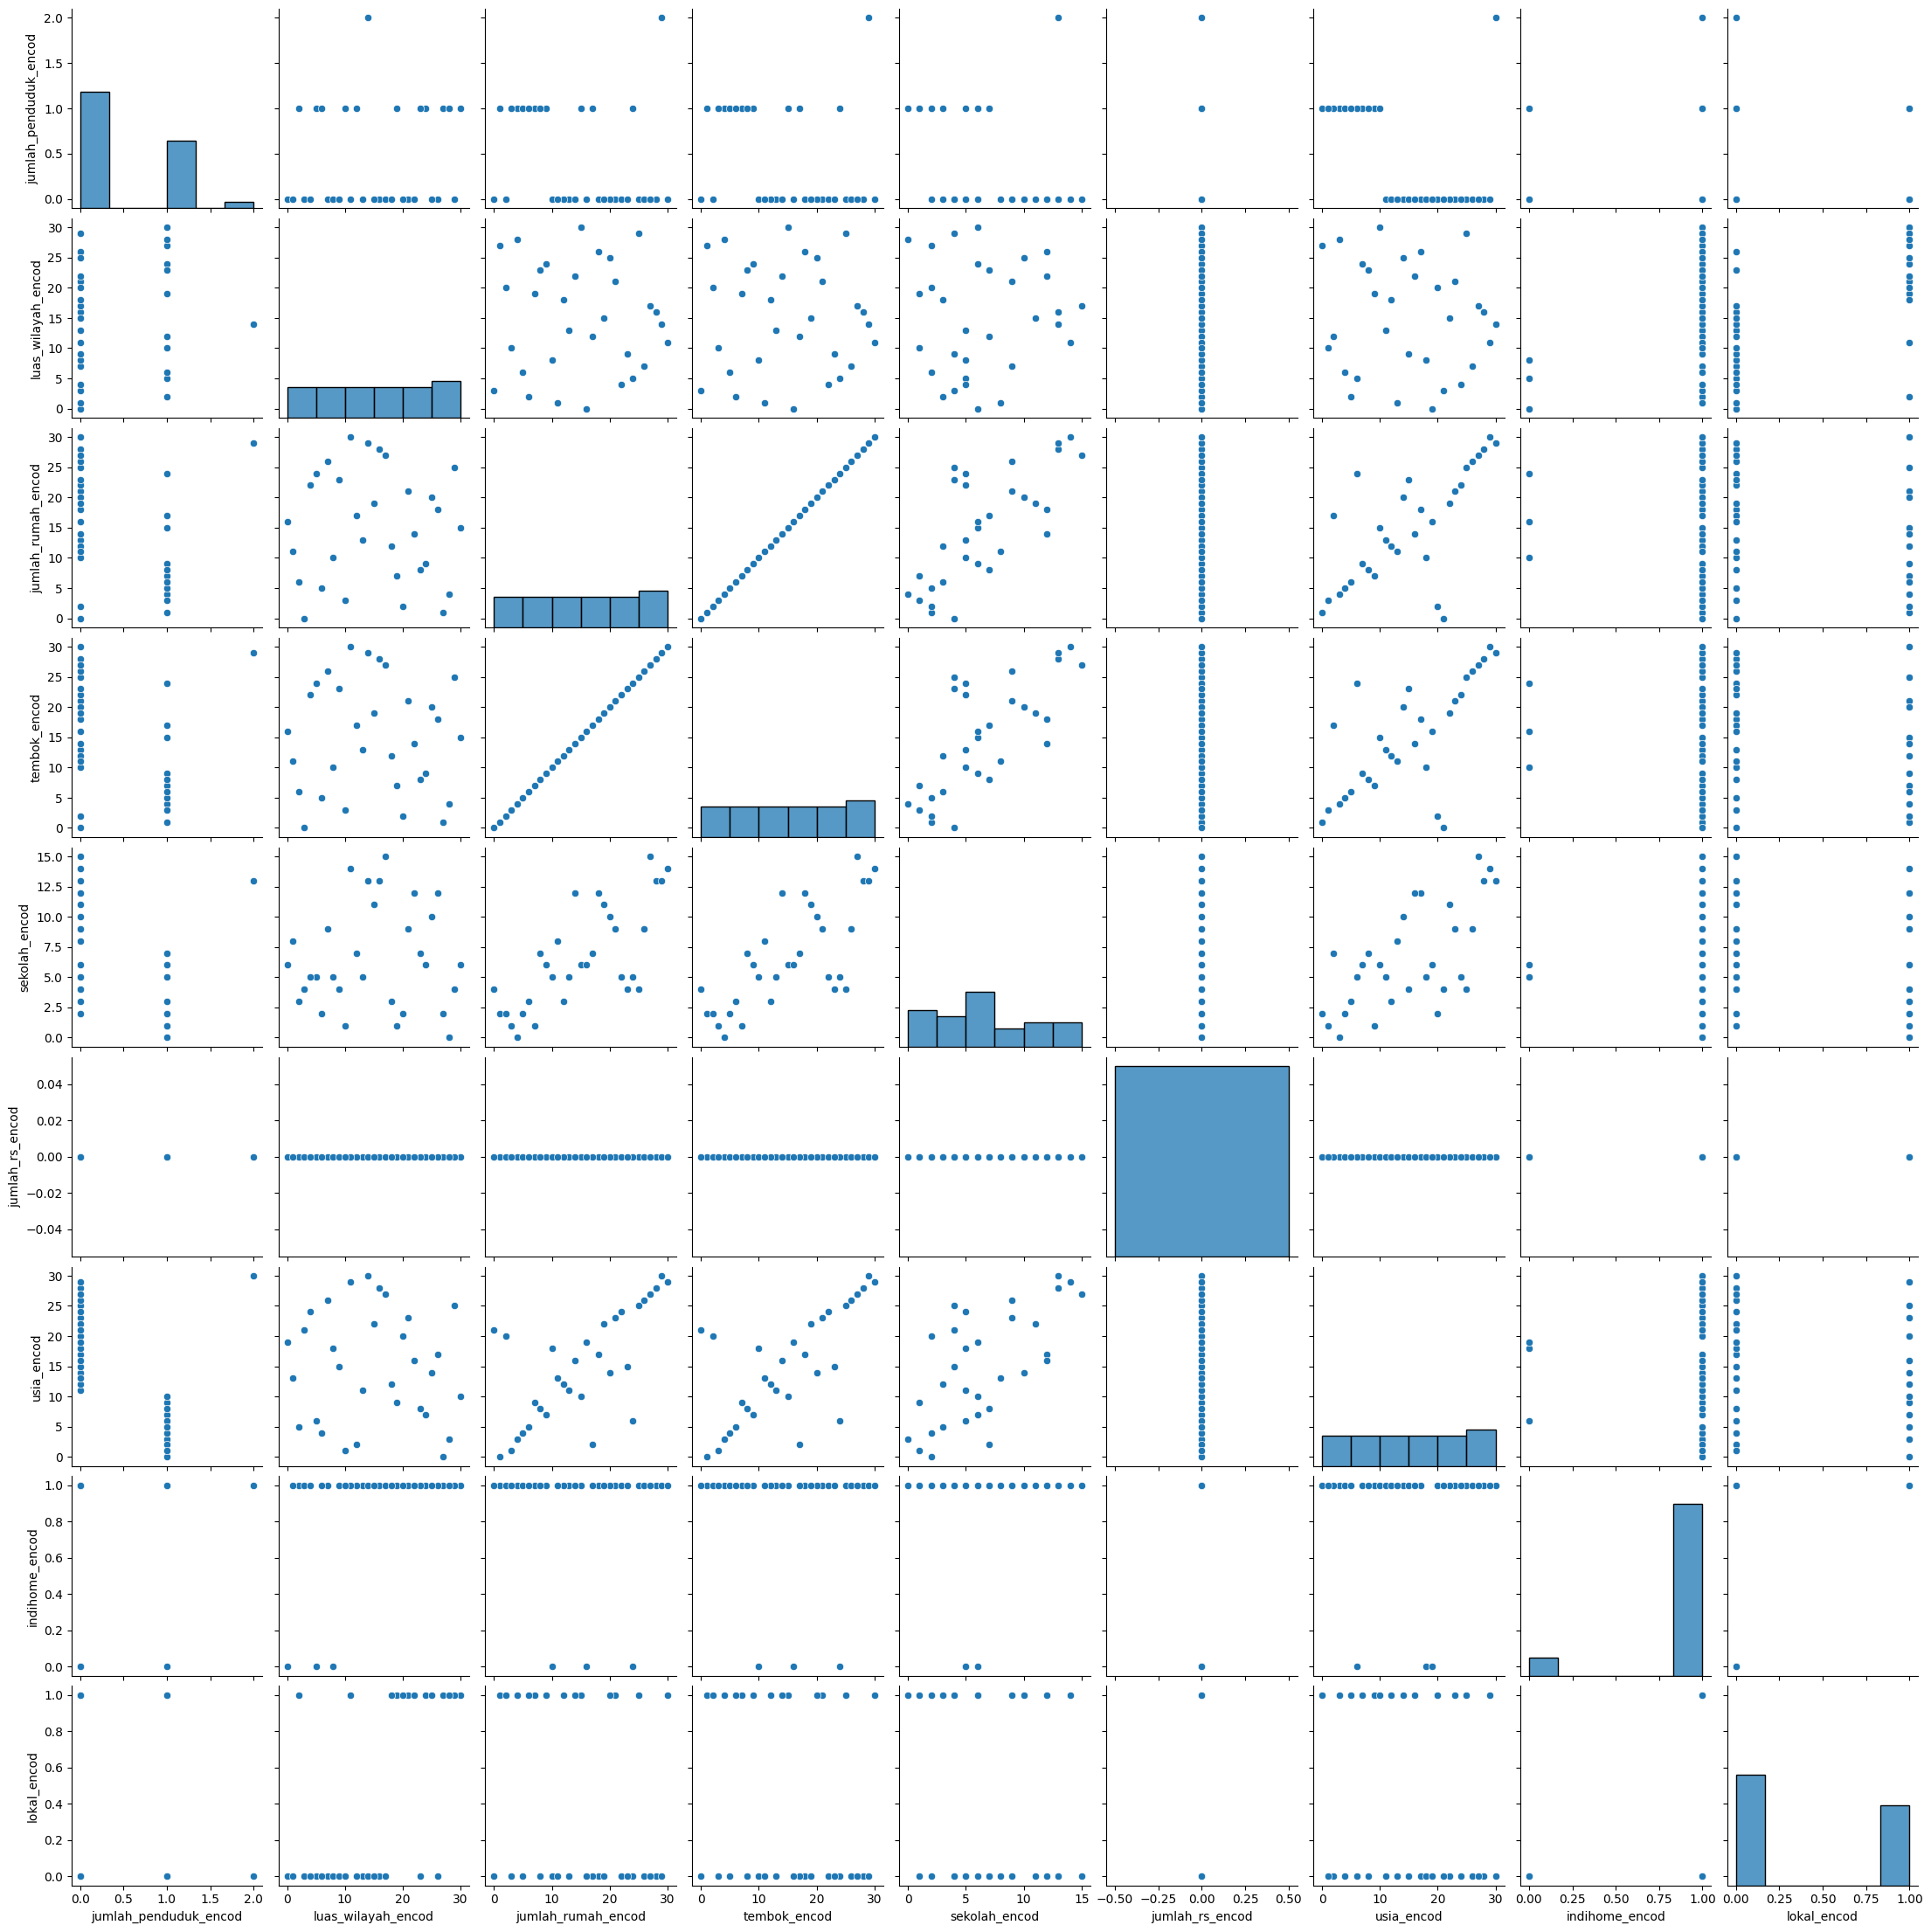

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(dataolahencoding)
plt.show()


## Clustering K-Means PCA

In [207]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

    principal component 1  principal component 2
0              -13.899637               3.065564
1              -25.722191              10.901529
2               -3.468762              15.174463
3              -11.727025               8.693248
4               15.531281              14.322645
5              -21.166531              11.943235
6                5.170655              11.465704
7              -12.111473               7.551897
8               11.338121               6.341313
9               -4.619715              -2.089552
10              -4.023895              -1.927493
11             -13.989537               2.847559
12              23.253437               2.121093
13              19.474496              -7.169299
14               6.155812              -8.421744
15              21.959509               3.178762
16              25.523092               0.147984
17               5.595011              10.801952
18               9.243411               0.304475
19             -17.8

Text(0.5, 1.0, 'Hasil PCA')

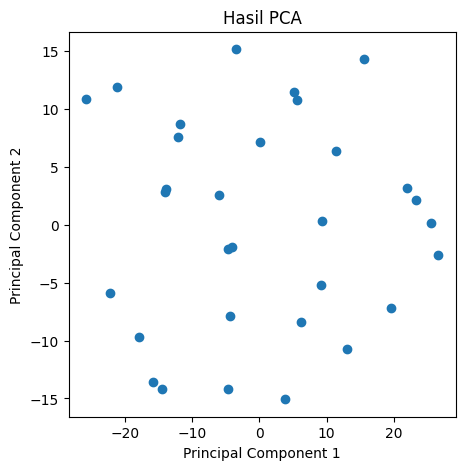

In [211]:
x = dataolahencoding
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

print(principalDf)
plt.figure(figsize=(5,5))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil PCA')

In [212]:
from sklearn.cluster import KMeans

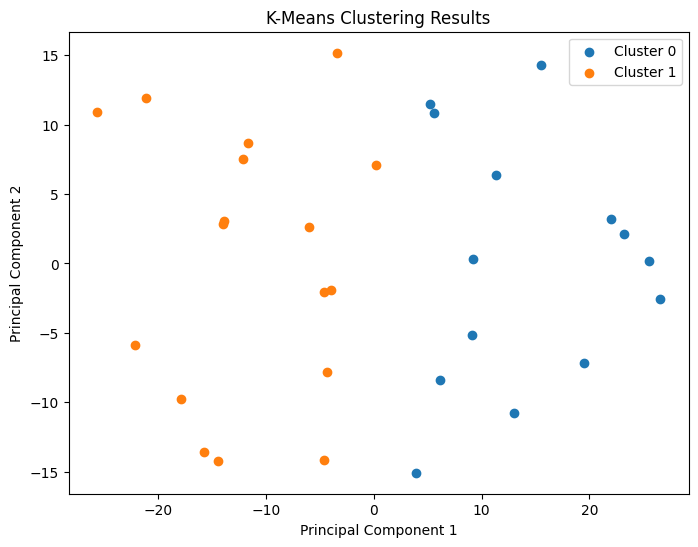

In [213]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

## Clustering K-Means Autoencoder

In [214]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [238]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataolahencoding)

input_dim = scaled_data.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
d_encoded = Dense(encoding_dim, activation='relu')(input_layer)
d_decoded = Dense(input_dim, activation='sigmoid')(d_encoded)

autoencoder = Model(input_layer, d_decoded)
encoder = Model(input_layer, d_encoded)

autoencoder.compile(optimizer='adam', loss='mse')

epoch = 25
autoencoder.fit(scaled_data, scaled_data, epochs=epoch, batch_size=32, shuffle=True)

encoded_data = encoder.predict(scaled_data)

encoded_df = pd.DataFrame(encoded_data, columns=['encoded_feature_1', 'encoded_feature_2'])

print(encoded_df.head())


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1273
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1270
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1267
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1265
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1262
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1260
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1257
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1255
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1252
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1250
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1247
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1245
Epoch 13/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1242
Epoch 14/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1240
Epoch 15/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1237
Epoch 16/25
1/1 ━━━━━━━━━━━━━━━━━━━━

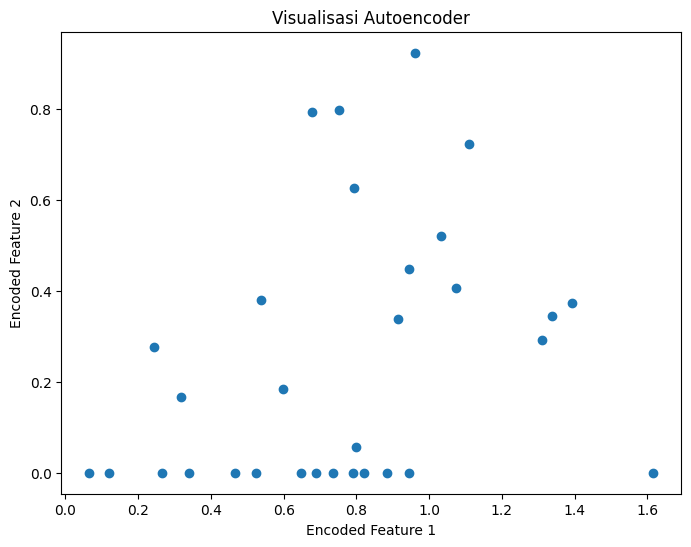

In [239]:
plt.figure(figsize=(8, 6))
plt.scatter(encoded_df['encoded_feature_1'], encoded_df['encoded_feature_2'])
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.title('Visualisasi Autoencoder')
plt.show()

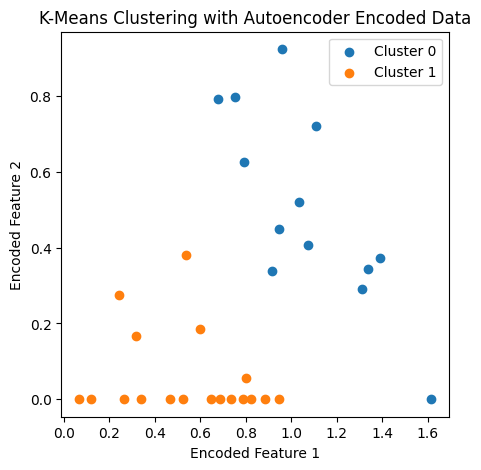

In [240]:
x_autoencoder = encoded_df[['encoded_feature_1', 'encoded_feature_2']]

n_clusters = 2
kmeans_autoencoder = KMeans(n_clusters=n_clusters)
kmeans_autoencoder.fit(x_autoencoder)
labels_autoencoder = kmeans_autoencoder.labels_

x_autoencoder['cluster'] = labels_autoencoder

plt.figure(figsize=(5, 5))
for i in range(n_clusters):
  plt.scatter(x_autoencoder[x_autoencoder['cluster'] == i]['encoded_feature_1'],
              x_autoencoder[x_autoencoder['cluster'] == i]['encoded_feature_2'],
              label=f'Cluster {i}')

plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.title('K-Means Clustering with Autoencoder Encoded Data')
plt.legend()
plt.show()